In [1]:
from operator import attrgetter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os


In [2]:
#verry important
os.chdir(r"C:/Users/nieli/Documents/uva/thesis/code/")
print(os.getcwd())

C:\Users\nieli\Documents\uva\thesis\code


In [3]:
try:
    pickle.load(open(r"PPA/results/results-2021-05-05_12-37-11/linear_ranking-Ackleyrun-0.p", "rb"))
except Exception as e:
    print(e) # you will find what is going on here

[Errno 2] No such file or directory: 'PPA/results/results-2021-05-05_12-37-11/linear_ranking-Ackleyrun-0.p'


In [50]:
df = pd.DataFrame(columns=['run_n', 'benchmark','selection_method','best_final_objval','best_objval','theoretical_optimum'])

directory = 'PPA/results/results-2021-05-05_16-39-16/'
for filename in os.listdir(directory):

    file = pickle.load(open(directory+filename,"rb"))

    
    df = df.append({
        'run_n':file.run_n,
        'benchmark':file.benchmark_name, 
        'selection_method':file.survivor_selection_name,
        'best_final_objval': min(individual.objective_value for individual in file.parent_population), #this is the best object value at the end of the run
        'best_objval': file.best_objval_during_run.objective_value,   #this is the best obj value recorded during the run
        'theoretical_optimum': file.benchmark.optimum
    }, ignore_index=True)
df['error'] = abs(df['best_objval'] - df['theoretical_optimum'])
df = df.astype({'theoretical_optimum':float,'error':float})


In [48]:
df = df.astype({'theoretical_optimum':float})

In [51]:
df.dtypes

run_n                   object
benchmark               object
selection_method        object
best_final_objval      float64
best_objval            float64
theoretical_optimum    float64
error                  float64
dtype: object

In [ ]:
df[df['benchmark'] == benchmark].groupby('selection_method').sum().reset_index()

In [33]:
df[df['benchmark'] == benchmark].groupby('selection_method').median()


,best_final_objval,best_objval
selection_method,,
linear_ranking,4.414077,0.706099
mulambda,6.365091,0.811453
mupluslambda,0.526676,0.526676
roulette_wheel,3.122731,0.661351
single_elitist_rws,0.643600,0.643600
tournament,0.140259,0.140259


In [22]:

sns.countplot(df['batting'], ax=ax[0])
sns.countplot(df['bowling'], ax=ax[1])
fig.show()

,run_n,benchmark,selection_method,best_final_objval,best_objval,theoretical_optimum,error


<Figure size 432x288 with 0 Axes>

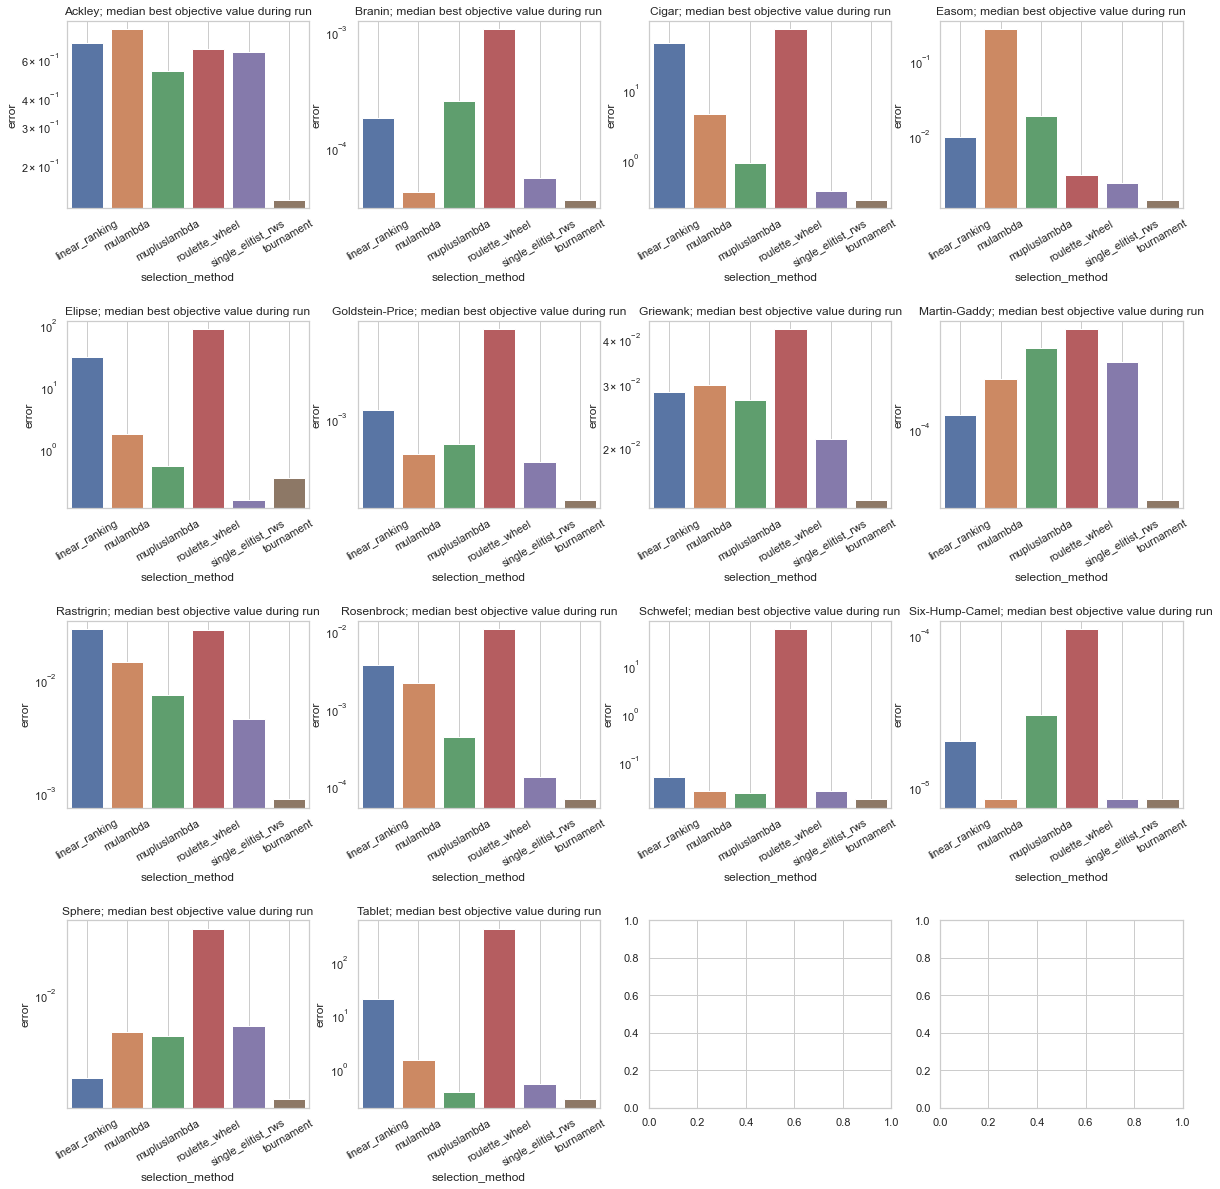

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [73]:
%matplotlib inline
fig, axes =plt.subplots(4,4, figsize=(20,20))
fig.subplots_adjust(hspace=0.6)
column = 0
row = 0
benchmarks = df.benchmark.unique()
i = 0
sns.set_theme(style="whitegrid")
for benchmark in benchmarks:
    
    plot_data = df[df['benchmark'] == benchmark]
    optimum = plot_data['theoretical_optimum'][:1].item()
    
    plot_data = plot_data.groupby('selection_method').median().reset_index()[['selection_method','error']]
    
    plt.figure(i)
    i+=1
    
    ax = sns.barplot(x="selection_method", y="error", data=plot_data, ax = axes[row][column])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(f'{benchmark}; median best objective value during run')
    ax.grid()
    ax.set_yscale("log")
    column +=1
    if i%4 == 0:
        row +=1
        column = 0

# %matplotlib inline
    
#     plt.axhline(optimum, c='r') not neccesary because now i plot the error, so the optimum is at error=0

<Figure size 432x288 with 0 Axes>

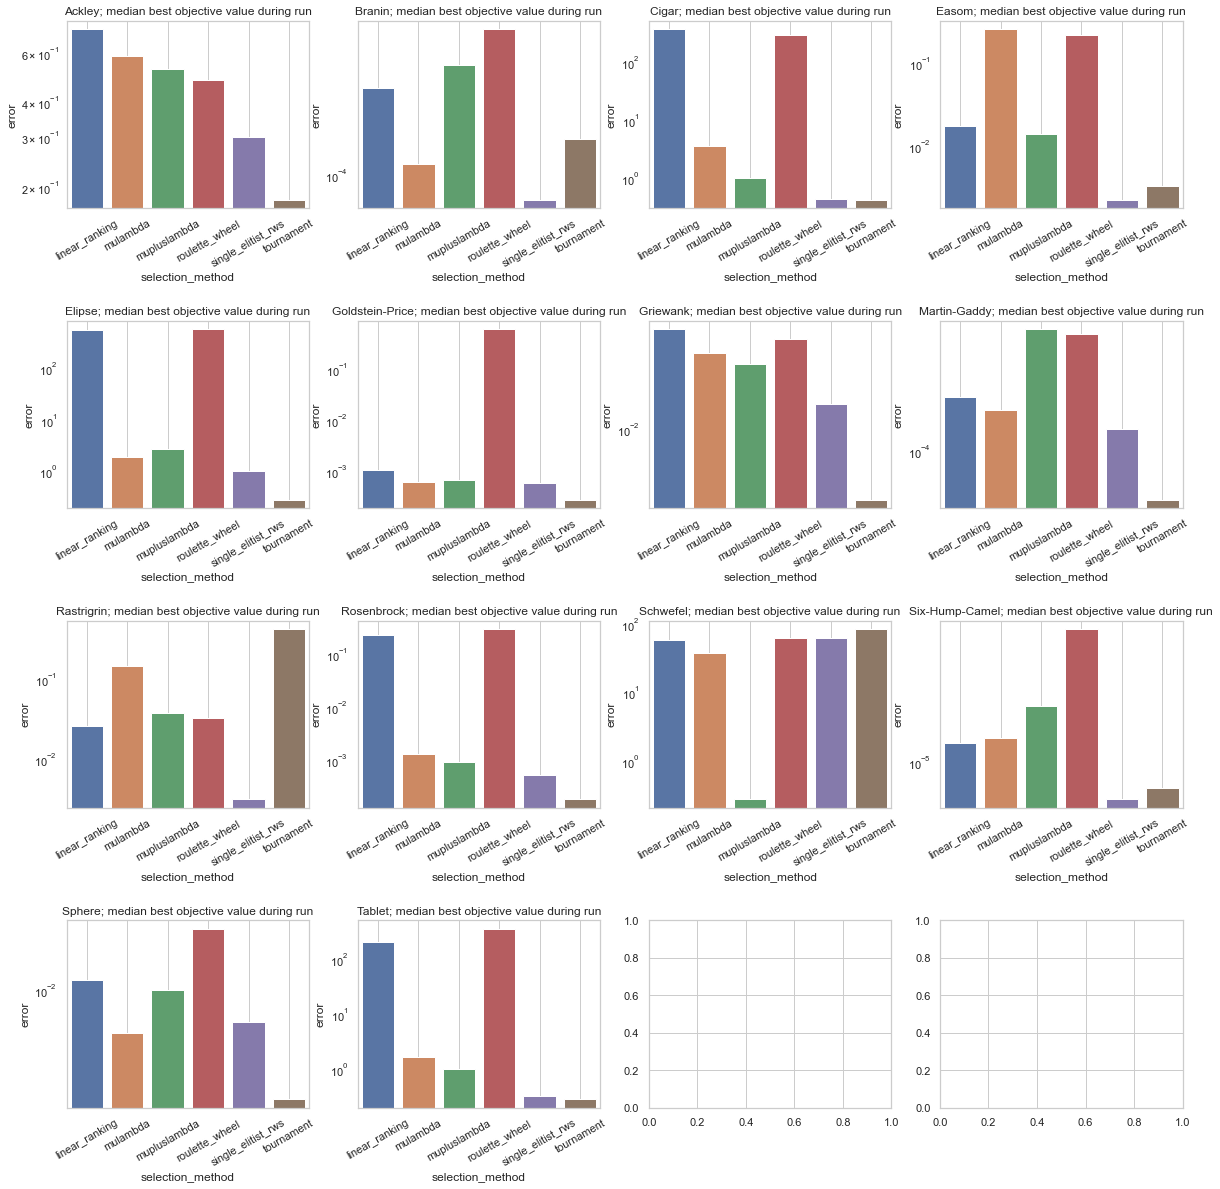

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [74]:
%matplotlib inline
fig, axes =plt.subplots(4,4, figsize=(20,20))
fig.subplots_adjust(hspace=0.6)
column = 0
row = 0
benchmarks = df.benchmark.unique()
i = 0
sns.set_theme(style="whitegrid")
for benchmark in benchmarks:
    
    plot_data = df[df['benchmark'] == benchmark]
    optimum = plot_data['theoretical_optimum'][:1].item()
    
    plot_data = plot_data.groupby('selection_method').std().reset_index()[['selection_method','error']]
    
    plt.figure(i)
    i+=1
    
    ax = sns.barplot(x="selection_method", y="error", data=plot_data, ax = axes[row][column])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(f'{benchmark}; median best objective value during run')
    ax.grid()
    ax.set_yscale("log")
    column +=1
    if i%4 == 0:
        row +=1
        column = 0

# %matplotlib inline
    
#     plt.axhline(optimum, c='r') not neccesary because now i plot the error, so the optimum is at error=0

In [122]:
try:
    test = pickle.load(open(r"PPA/results/test/mc-test.p", "rb"))
except Exception as e:
    print(e) # 

In [ ]:
test.heritage.relations

In [ ]:
import collections
import json

def construct_trees_by_TingYu(edges):
    """Given a list of edges [child, parent], return trees. """
    trees = collections.defaultdict(dict)

    for child, parent in edges:
        trees[parent][child] = trees[child]

    # Find roots
    children, parents = zip(*edges)
    roots = set(parents).difference(children)

    return {root: trees[root] for root in roots}

if __name__ == '__main__':
    edges = [[0, 6], [17, 5], [2, 7], [4, 14], [12, 9], [15, 5], [11, 1], [14, 8], [16, 6], [5, 1], [10, 7], [6, 10], [8, 2], [13, 1], [1, 12], [7, 1], [3, 2], [19, 12], [18, 19]]
    edges = [[8,5],[7,5],[4,2],[5,2],[6,3],[2,1],[3,1]]
    edges = test.heritage.relations
    results = json.dumps(construct_trees_by_TingYu(edges), indent=1)
    print(results)
    with open('PPA/notebooks/test2.json', 'w') as outfile:
        json.dump(results, outfile)

In [129]:
text_file = open("PPA/notebooks/test3.js", "w") 
text_file.write('var example_tree = ' + results)
text_file.close()